<a href="https://colab.research.google.com/github/Nydhal/Python-Notebooks/blob/master/FSL_CSE569_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics
%matplotlib inline

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz")

We import libraries and data.

(60000, 28, 28)
(10000, 28, 28)
0


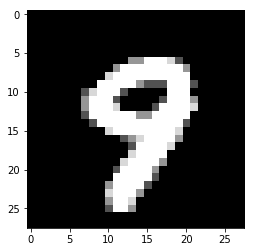

In [349]:
print(x_train.shape)
print(x_test.shape)
x_or_y = 0
sample_number,pixel_row,pixel_col = 5999,27,27
print((x_train, y_train)[x_or_y][sample_number][pixel_row][pixel_col])
plt.imshow(x_train[5999], cmap='Greys_r')

[  0   0   0   0   0   0   0   0   0   0  95 253 252 252 252 252 253 252
 252 252 252 245  80   0   0   0   0   0]
35.108418367346935


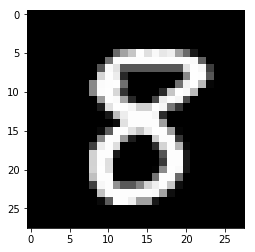

In [351]:

sample_number,pixel_row,pixel_col = 333,6,0
print((x_train, y_train)[x_or_y][sample_number][pixel_row])
plt.imshow(x_train[333], cmap='Greys_r')
print(x_train[0].mean())

We check the shape of the data and look at some values and check the mean function.


In [204]:
mean_train = x_train.mean(axis=(1,2))
mean_train.shape

(60000,)

Calculate the mean for the train set. and check the shape (1d array 6000 values)



In [205]:
var_train = x_train.var(axis=2).mean(axis=1)
var_train.shape

(60000,)

Do the same with average of the row variance.

In [206]:
mean_test = x_test.mean(axis=(1,2))
mean_test.shape
var_test = x_test.var(axis=2).mean(axis=1)
var_test.shape

(10000,)

Do above steps for the test set.

Below we plot the data points for the train and trest set respectively for all character values (0 to 9)

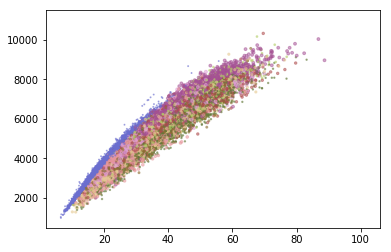

In [314]:
plt.scatter(mean_train,var_train,c=y_train,s=y_train,alpha=0.5,cmap='tab20b')

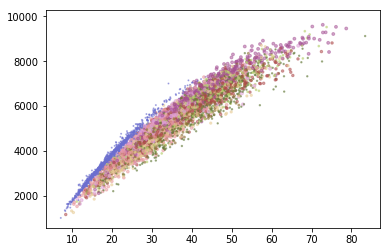

In [229]:
plt.scatter(mean_test,var_test,c=y_test,s=y_test,alpha=0.5,cmap='tab20b')

In the next lines, we train a naive bayes gaussian classifier which will estimate the densities of 10 gaussian deistribution of equal priors (by default).
We then print our accuracy (~ 0.23)

In [293]:
train_data = np.array(list(zip(mean_train,var_train)))
test_data = np.array(list(zip(mean_test,var_test)))

gauss = GaussianNB()
gauss.fit(train_data, y_train)
y_pred = gauss.predict(test_data)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2293


In this step we consider only the binary classification case (0 , 1).
We first filter all other classes (2 to 9) from the data using pandas dataframes.

In [0]:
train_01 = pd.DataFrame({'mean':mean_train,'var':var_train,'y':y_train})
train_01 = train_01[(train_01['y'] == 0) | (train_01['y'] == 1)]
test_01 = pd.DataFrame({'mean':mean_test,'var':var_test,'y':y_test})
test_01 = test_01[(test_01['y'] == 0) | (test_01['y'] == 1)]

We plot the training data (zero is blue, one is red).

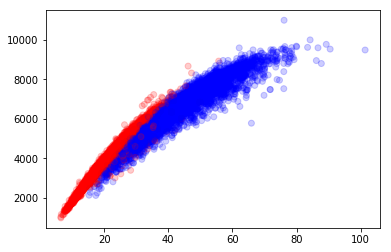

In [347]:
 plt.scatter(train_01['mean'],train_01['var'],c=train_01['y'],cmap='bwr',alpha=0.2)

We fit our Gaussian estimation again and print the accuracy.
Accuracy increases since we have less class overlap and better decision boundary.

In [343]:
gauss_01 = GaussianNB()
gauss_01.fit(train_01[['mean','var']], train_01['y'])
y_pred_01 = gauss.predict(test_01[['mean','var']])

print("Accuracy:",metrics.accuracy_score(test_01['y'], y_pred_01))

Accuracy: 0.6836879432624113


Our accuracy is around 0.68
We plot the test values below.

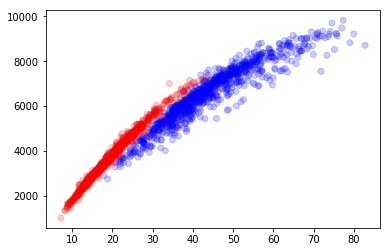

In [346]:
 plt.scatter(test_01['mean'],test_01['var'],c=test_01['y'],cmap='bwr',alpha=0.2)